# Pymaceuticals Inc.
---

### Analysis

- 10 drugs regimens were tested on 248 mice over multiple timepoints. 
- The number of male and female mice was roughly equal, which removes sex-bias from the study.
- Analysis was narrowed down on four of the drugs. 
- Ramicane and Capomulin showed more reductionin tumor volume. 
- There was only one outlier observed with one of the drugs tested, suggesting that the study was conducted in a well-controlled environment.
- There is a positive corelation between mice weight and tumor volume for Capomulin regimen.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_df

In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#duplicate_mice = [combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_df.loc[combined_df["Mouse ID"]=="g989"]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = combined_df.drop_duplicates(subset=['Mouse ID', "Timepoint"], keep=False)
#cleaned_df
cleaned_df = combined_df[combined_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = cleaned_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_df = cleaned_df.groupby(["Drug Regimen"])
mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
SD = grouped_df["Tumor Volume (mm3)"].std()
SEM = grouped_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                        "Median Tumor Volume" : median,
                        "Tumor Volume Variance" : variance,
                        "Tumor Volume Std. Dev." : SD,
                        "Tumor Volume Std. Err." : SEM})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Using the aggregation method,
#very interesting, something new!! I googled this up and really liked it! 
summary_df_by_agg = cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_df_by_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

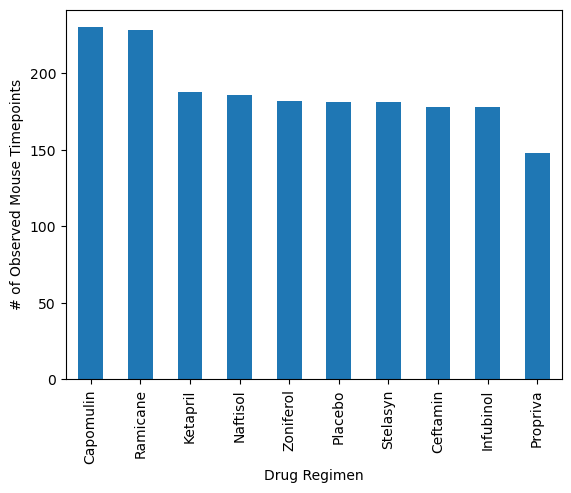

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoints = cleaned_df.groupby(['Drug Regimen']).count()
timepoints
timepoints_df = timepoints.reset_index()

#timepoints.set_index("Drug Regimen")
timepoints_df_sorted = timepoints_df.sort_values('Mouse ID',ascending=False)
#plot bar chart
timepoints_df_sorted.plot.bar(x="Drug Regimen", y = "Mouse ID", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints", legend = False )
plt.show()

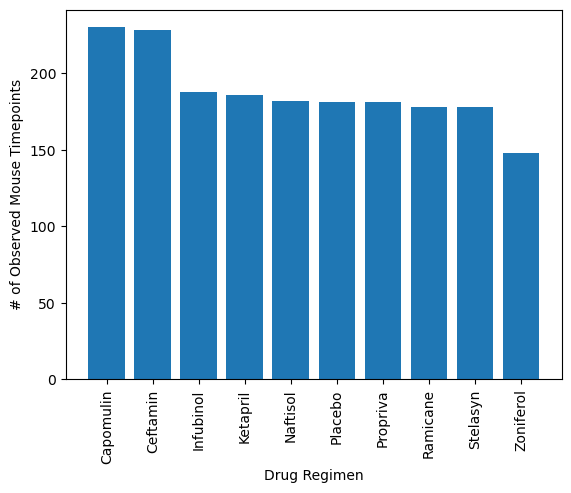

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = cleaned_df.groupby(['Drug Regimen']).count()
timepoints
timepoints_df = timepoints.reset_index()

#timepoints.set_index("Drug Regimen")
timepoints_df


#set x_axis
x_axis = np.arange(len(timepoints_df))
#set tick locations
tick_locations = [value for value in x_axis]
#plot bar chart
plt.bar(x_axis, timepoints_df["Mouse ID"].sort_values(ascending=False), align = "center")
#place ticks
plt.xticks(tick_locations, timepoints_df["Drug Regimen"], rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

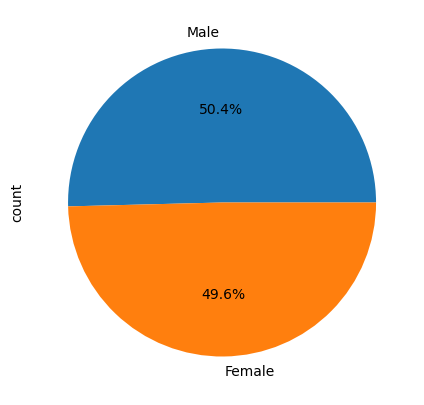

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
    
# Get the unique mice with their gender
sex = cleaned_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()
sex
# Make the pie chart
sex.sort_values(ascending=False).plot.pie(figsize=(5, 5), autopct='%.1f%%')
plt.ylabel("count")
plt.show()

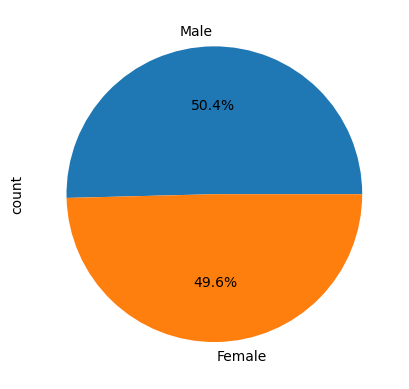

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Get the unique mice with their gender
sex = cleaned_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()
sex
#sex_df = sex.reset_index()
#sex_df

# Make the pie chart
plt.pie(sex, autopct ='%.1f%%', labels=["Male", "Female"])
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cleaned_df_group_by_regimen = cleaned_df.groupby(["Mouse ID","Drug Regimen"]).max("Timepoint")
cleaned_df_group_by_regimen = cleaned_df_group_by_regimen.reset_index()
cleaned_df_group_by_regimen

df_filtered_regimen = cleaned_df_group_by_regimen.loc[cleaned_df_group_by_regimen["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
df_filtered_regimen


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_filtered_regimen_merged = pd.merge(cleaned_df_group_by_regimen, cleaned_df, on=['Mouse ID', 'Timepoint'])
df_filtered_regimen_merged

,Mouse ID,Drug Regimen_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,Infubinol,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,a251,Infubinol,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,a262,Placebo,17,29,45,70.717621,4,Placebo,Female,17,29,70.717621,4
3,a275,Ceftamin,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
4,a366,Stelasyn,16,29,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,z435,Propriva,12,26,10,48.710661,0,Propriva,Female,12,26,48.710661,0
244,z578,Ramicane,11,16,45,45.000000,0,Ramicane,Male,11,16,30.638696,0
245,z581,Infubinol,24,25,45,62.754451,3,Infubinol,Female,24,25,62.754451,3
246,z795,Naftisol,13,29,45,65.741070,3,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [treatment for treatment in df_filtered_regimen["Drug Regimen"].unique()]
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes


# add subset

# Determine outliers using upper and lower bounds
for treatment in treatments:
    df_filtered_treatment = df_filtered_regimen_merged[df_filtered_regimen_merged["Drug Regimen_x"] == treatment]
    final_tumor_volumes = df_filtered_treatment["Tumor Volume (mm3)_y"]
    tumor_vol_data.append(final_tumor_volumes)

#outliers = {}
#for i, treatment in enumerate(treatments):
#    tumor_volumes = tumor_vol_data[i]
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    outliers = df_filtered_treatment[(df_filtered_treatment["Tumor Volume (mm3)_y"] < lower_bound) | 
                                        (df_filtered_treatment["Tumor Volume (mm3)_y"] > upper_bound)]
    
    print(f"{treatment}'s Potential Outliers: {outliers}")

Infubinol's Potential Outliers:    Mouse ID Drug Regimen_x  Age_months_x  Weight (g)_x  Timepoint  \
31     c326      Infubinol            18            25          5   

    Tumor Volume (mm3)_x  Metastatic Sites_x Drug Regimen_y     Sex  \
31                  45.0                   0      Infubinol  Female   

    Age_months_y  Weight (g)_y  Tumor Volume (mm3)_y  Metastatic Sites_y  
31            18            25             36.321346                   0  
Ceftamin's Potential Outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen_x, Age_months_x, Weight (g)_x, Timepoint, Tumor Volume (mm3)_x, Metastatic Sites_x, Drug Regimen_y, Sex, Age_months_y, Weight (g)_y, Tumor Volume (mm3)_y, Metastatic Sites_y]
Index: []
Ramicane's Potential Outliers: Empty DataFrame
Columns: [Mouse ID, Drug Regimen_x, Age_months_x, Weight (g)_x, Timepoint, Tumor Volume (mm3)_x, Metastatic Sites_x, Drug Regimen_y, Sex, Age_months_y, Weight (g)_y, Tumor Volume (mm3)_y, Metastatic Sites_y]
Index: []
Capomu

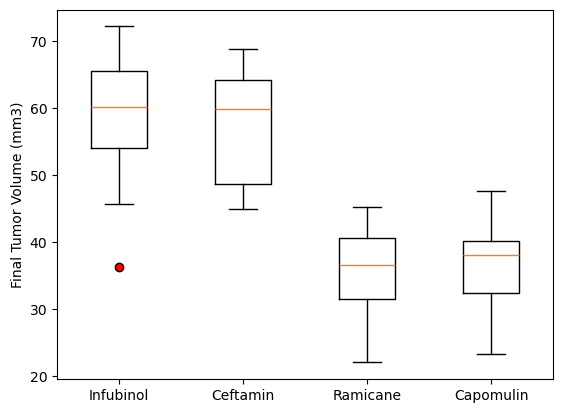

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

ax.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

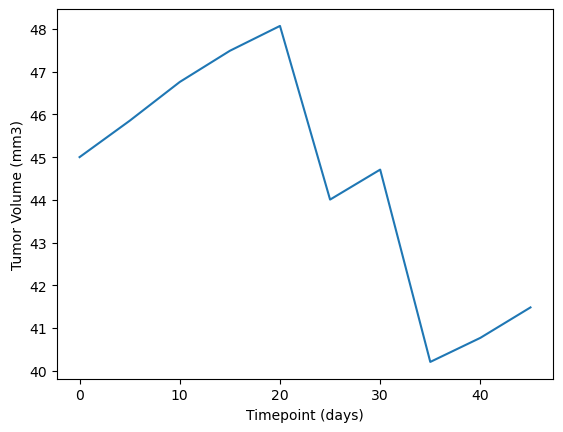

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509"]
l509_df
plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

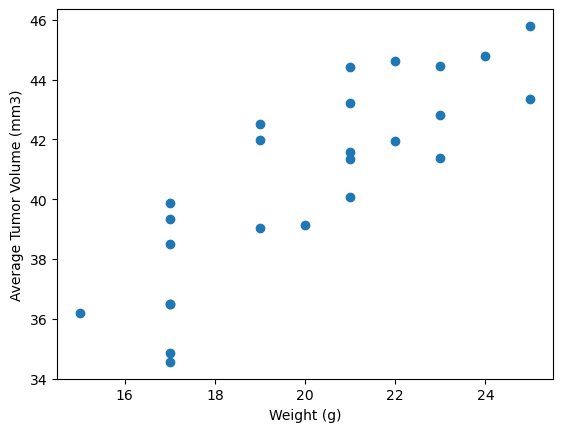

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_df
capomulin_df_avg = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
capomulin_df_avg

plt.scatter(capomulin_df_avg["Weight (g)"],capomulin_df_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722
Regression values: 0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64


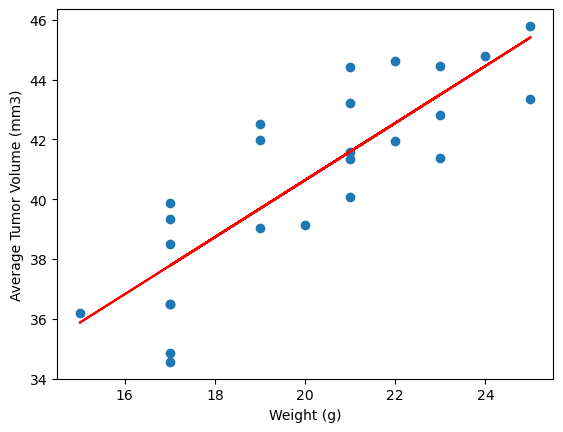

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_val = capomulin_df_avg['Weight (g)']
y_val = capomulin_df_avg['Tumor Volume (mm3)']

correlation_coeff = x_val.corr(y_val)
print(f"Correlation Coefficient: {correlation_coeff}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression_values = slope * x_val + intercept
print(f"Regression values: {regression_values}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_val, y_val)
plt.plot(x_val, regression_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()